<a href="https://colab.research.google.com/github/tripnv/snake/blob/master/envs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install stable-baselines3

     |████████████████████████████████| 153kB 15.4MB/s 


In [5]:
import sys
import os
sys.path.append('/content/drive/MyDrive/snake_drive')

In [6]:
!ls

drive  sample_data


In [7]:
%cd drive/MyDrive/snake_drive/

/content/drive/MyDrive/snake_drive


In [15]:
!git clone https://github.com/tripnv/snake

fatal: not a git repository (or any parent up to mount point /content)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [8]:
sys.path.append('/content/drive/MyDrive/snake_drive/snake')

In [9]:
import snake_gym
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

In [20]:
import numpy as np
import cv2
import os
from IPython.display import clear_output, Image
import imageio

In [21]:
env = snake_gym.Environment()
initial_observation = env.reset()

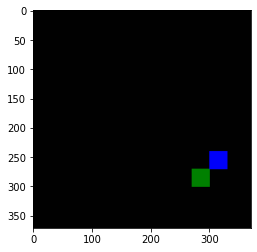

In [22]:
plt.imshow(initial_observation)

Colors are switched because of the opencv RGB BGR thing.
<br>
Blue is red, aka the apple.

In [23]:
env.canvas.shape

(371, 371, 3)

In [25]:
directory_path = "/content/drive/MyDrive/snake_drive/videos/"

In [28]:
env = snake_gym.Environment()
env.reset()

os.chdir(directory_path)

episode = []
i = 0
done = False
while(done == False):
  print(i)
  img, rew, done, info = env.step(env.action_space.sample())
  episode.append(env.render(mode = 'rgb_array'))
  print("Reward: ", rew)
  print("Done: ", done)
  i += 1

np_episode = np.array(episode)
imageio.mimwrite('episode_' + str(datetime.now().strftime("%H:%M:%S")) + '.mp4',
                                  np_episode, fps = 2)

0
Reward:  1
Done:  False
1
Reward:  1
Done:  False
2
Reward:  1
Done:  False
3
Reward:  1
Done:  False
4
Reward:  1
Done:  False
5
Reward:  1
Done:  False
6
Reward:  1
Done:  False
7
Reward:  1
Done:  False
8
Reward:  1
Done:  False
9
Reward:  1
Done:  False
10
Reward:  1
Done:  False
11
Reward:  1
Done:  False
12
Reward:  1
Done:  False
13
Reward:  1
Done:  False
14
Reward:  1
Done:  False
15
Reward:  1
Done:  False
16
Reward:  1
Done:  False
17
Reward:  1
Done:  False
18
Reward:  1
Done:  False
19
Reward:  1
Done:  False
20
Reward:  1
Done:  False
21
Reward:  -10
Done:  True


In [32]:
from stable_baselines3.common.env_checker import check_env

In [34]:
check_env(env, skip_render_check=True)

No warning for now.

#### Q-Learning

In [38]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg
!pip install 'imageio==2.4.0'
!pip install pyvirtualdisplay
!pip install tf-agents

Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:7 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:9 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [61.8 kB]
Ign:12 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:13 https://developer.dow

     |████████████████████████████████| 1.2MB 13.8MB/s 
     |████████████████████████████████| 4.8MB 63.7MB/s 
  Found existing installation: tensorflow-probability 0.12.1
    Uninstalling tensorflow-probability-0.12.1:
      Successfully uninstalled tensorflow-probability-0.12.1


In [1]:
import pyvirtualdisplay
import base64
import tensorflow as tf
import PIL.Image

from tf_agents.agents.dqn import dqn_agent
from tf_agents.environments import suite_gym
from tf_agents.environments import tf_py_environment
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common

In [2]:
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

In [3]:
num_iterations = 20000 # @param {type:"integer"}

initial_collect_steps = 100  # @param {type:"integer"} 
collect_steps_per_iteration = 1  # @param {type:"integer"}
replay_buffer_max_length = 100000  # @param {type:"integer"}

batch_size = 64  # @param {type:"integer"}
learning_rate = 1e-3  # @param {type:"number"}
log_interval = 200  # @param {type:"integer"}

num_eval_episodes = 10  # @param {type:"integer"}
eval_interval = 1000  # @param {type:"integer"}

In [ ]:
env = suite_gym.absolute_import.